In [66]:
import numpy as np
from county_ratio import factor1_county
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import csv
from adjustText import adjust_text
#get population of each county
fin = open('population_county_CA.txt','r')
fout = open('clean_CA_population.txt','w+')

population = {}

for line in fin:
    line = line.replace('County','')
    fout.write(line)
    x = line.split()
    dict_name = ''
    for word in x:
        word = word.replace(',','')
        if word.isdigit() == False:
            dict_name = dict_name + (str(word)+' ')
        else:
            pass
    population[dict_name.upper()[:-1]] = int(x[-1].replace(',',''))
fin.close()
fout.close()

In [67]:
#get number of vehicles of each county
fin = open('vehicles_number.txt','r')

n_vehicles = {}

for line in fin:
    line = line.replace(',','')
    x = line.split()
    dict_name = ''
    for word in x:
        if word.isdigit() == False:
            dict_name += (word+' ')
        else:
            pass
    n_vehicles[dict_name[:-1]] = int(x[-1])
fin.close()

In [68]:
#get area of each county
fin = open('county_area.txt','r')

area = {}

for line in fin:
    line = line.replace(',','')
    line = line.replace('sq mi','')
    line = line.replace('CA /','')
    x = line.split()
    x = x[1:-1]
    dict_name = ''
    for word in x[1:]:
        dict_name+= (word+' ')
    area[dict_name[:-1].upper()] = float(x[0])

In [69]:
#get number of accidents in each county
n_accidents = factor1_county("CA_data.csv")
n_accidents = dict(n_accidents)
new_dict = dict([(value,key) for key, value in n_accidents.items()])
for key,value in new_dict.items():
    new_dict[key] = value.upper()
n_accidents = dict([(value,key) for key,value in new_dict.items()])

In [70]:
#categorize small samples to 'others'
for key,value in n_accidents.items():
    n_accidents[key] = int(n_accidents[key])
n_accidents_sum = sum(n_accidents.values())
n_accidents['OTHERS'] = 0
population['OTHERS'] = 0
n_vehicles['OTHERS'] = 0
area['OTHERS'] = 0
keys_small = []

for key,value in n_accidents.items():
    if key != 'OTHERS':
        if n_accidents[key]/n_accidents_sum <= 0.02:
            n_accidents['OTHERS'] += n_accidents[key]
            n_vehicles['OTHERS'] += n_vehicles[key]
            population['OTHERS'] += population[key]
            area['OTHERS'] += area[key]
            keys_small.append(key)

for key in keys_small:
    del n_accidents[key]
    del n_vehicles[key]
    del population[key]
    del area[key]


In [71]:
#get population, number of vehicles and number of accidents per sq mi
population_per = {}
n_vehicles_per = {}
n_accidents_per = {}

for key, value in area.items():
    population_per[key] = population[key]/area[key]
    n_vehicles_per[key] = n_vehicles[key]/area[key]
    n_accidents_per[key] = n_accidents[key]/area[key] 
    
population_per = {k:v for k,v in sorted(population_per.items(),key =lambda item:item[1])}



In [72]:
#plot
labels = []
population_plot = []
n_vehicles_plot =[]
n_accidents_plot =[]

for key,value in population_per.items():
    labels.append(key)
    population_plot.append(value)
    n_vehicles_plot.append(n_vehicles_per[key])
    n_accidents_plot.append(n_accidents_per[key])



d:\app\python\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


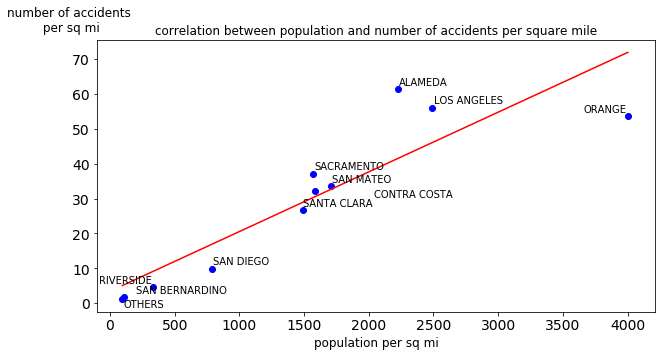

In [75]:
#get scatter plot
fig1 = plt.figure(figsize = (10,5))
texts =[]
for i,county in enumerate(labels):
    x = population_plot[i]
    y = n_accidents_plot[i]
    plt.scatter(x,y,marker = 'o',color = 'blue')
    texts.append(plt.text(x+0.3,y+0.3,county,fontsize = 10))


adjust_text(texts)
coeff1 = np.polyfit(population_plot,n_accidents_plot,1)
poly1d_fn = np.poly1d(coeff1)
plt.plot(population_plot,poly1d_fn(population_plot),'-',color = 'red')
plt.tick_params(axis="both", labelsize=14)
ax = plt.axes()
ax.yaxis.set_label_coords(-0.05,1.02)
plt.title('correlation between population and number of accidents per square mile',fontsize = 12)
plt.xlabel('population per sq mi',fontsize = 12)
plt.ylabel('number of accidents\n per sq mi',fontsize = 12,rotation = 0)

fig1.savefig('pop.png', transparent=True)
plt.show()


d:\app\python\lib\site-packages\ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()


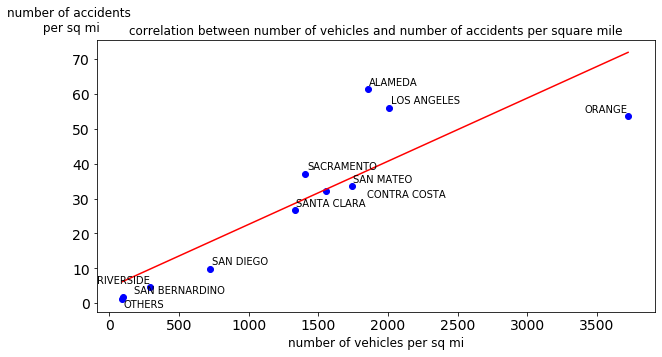

In [76]:
#get scatter plot
fig2 = plt.figure(figsize = (10,5))
texts =[]
for i,county in enumerate(labels):
    x = n_vehicles_plot[i]
    y = n_accidents_plot[i]
    plt.scatter(x,y,marker = 'o',color = 'blue')
    texts.append(plt.text(x+0.3,y+0.3,county,fontsize = 10))

adjust_text(texts)
coeff2 = np.polyfit(n_vehicles_plot,n_accidents_plot,1)
poly1d_fn2 = np.poly1d(coeff2)
plt.plot(n_vehicles_plot,poly1d_fn2(n_vehicles_plot),'-',color = 'red')

plt.tick_params(axis="both", labelsize=14)
ax = plt.axes()
ax.yaxis.set_label_coords(-0.05,1.02)
plt.title('correlation between number of vehicles and number of accidents per square mile',fontsize = 12)
plt.xlabel('number of vehicles per sq mi',fontsize = 12)
plt.ylabel('number of accidents\n per sq mi',fontsize = 12,rotation = 0)
fig2.savefig('vehicle.png', transparent=True)
plt.show()